In [1]:
import scipy
import numpy as np

# load .mat data with expected structure
in_file = '../data/Gefionella.mat'
mdict = {}
matlab_data = scipy.io.loadmat(in_file, mdict=mdict)

name = list(mdict)[-1]
matlab_data = matlab_data[name][0, 0]

data = matlab_data[7]

map_shape = tuple(matlab_data[5][0])

x_axis = matlab_data[9][1][0][0]
# data = np.reshape(data, (map_shape[1], map_shape[0], -1))
print(data.shape)

(1200, 1600)


In [2]:
# Loaded data smoothing

from scipy import sparse
lam = 1600

def whittaker_vectorized(Y, lmd=lam, d=2):
    if Y.ndim != 2:
        raise ValueError("Input must be a 2D array")

    num_spectra, L = Y.shape
    E = sparse.csc_matrix(np.diff(np.eye(L), d))
    W = sparse.spdiags(np.ones(L), 0, L, L)
    Z = W + lmd * E.dot(E.transpose())

    # Pre-factorize Z for efficiency
    Z_inv = sparse.linalg.factorized(Z)

    # Solve for each spectrum (each row in Y)
    smoothed_data = np.array([Z_inv(Y[i, :]) for i in range(num_spectra)])

    return smoothed_data

smoothed_data = whittaker_vectorized(data)

/home/filip/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


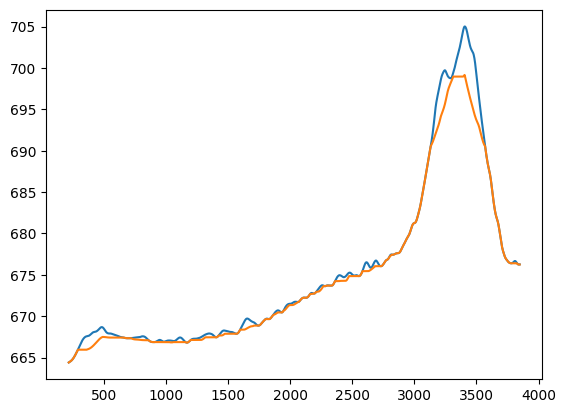

In [3]:
from br import imodpoly, morph_br
import matplotlib.pyplot as plt

spectrum = smoothed_data[0]
base = morph_br(spectrum, 50)
plt.plot(x_axis, spectrum)
plt.plot(x_axis, base)
plt.show()

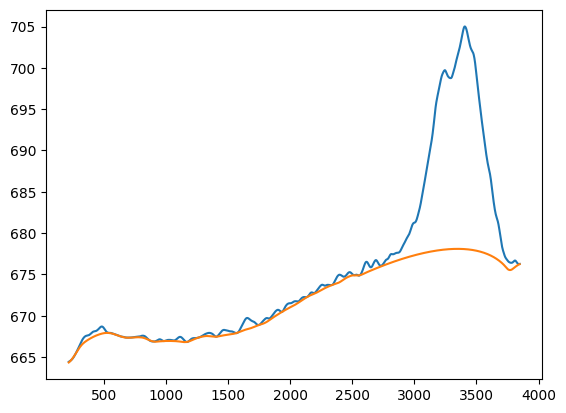

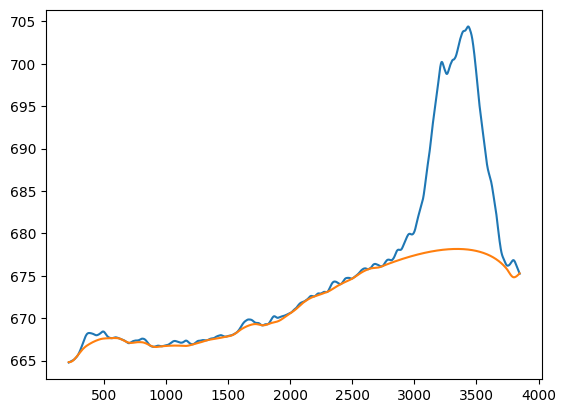

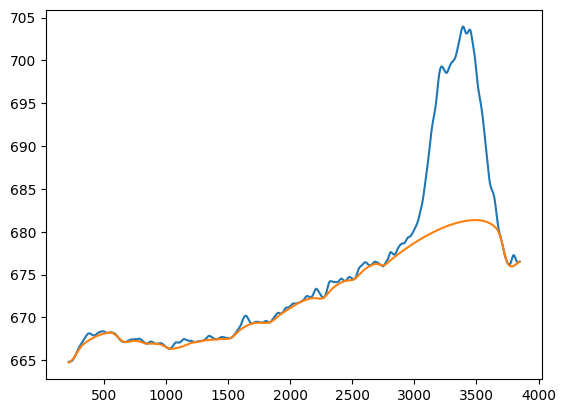

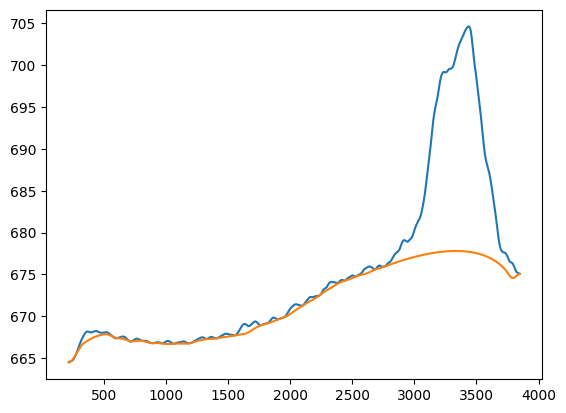

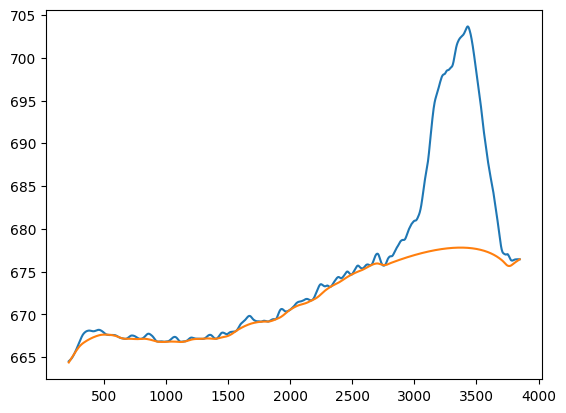

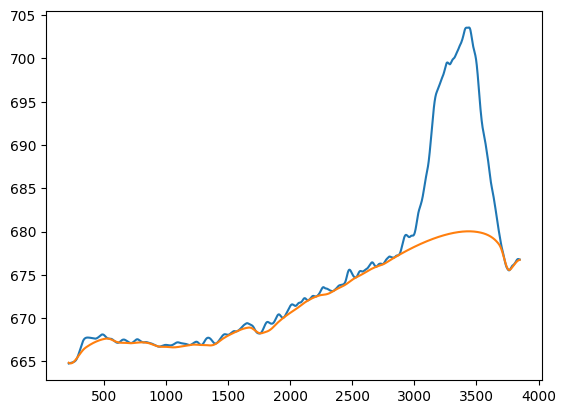

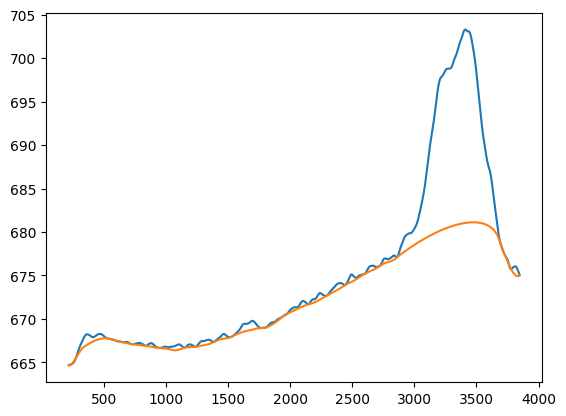

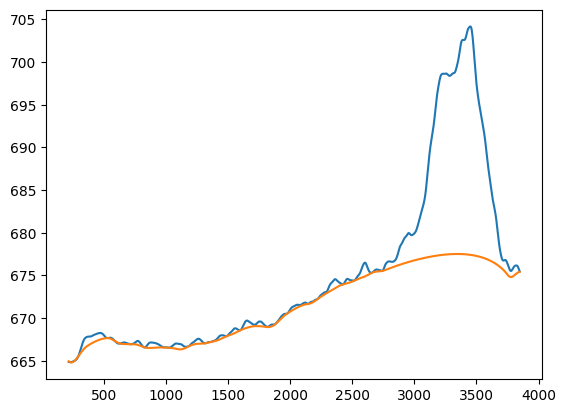

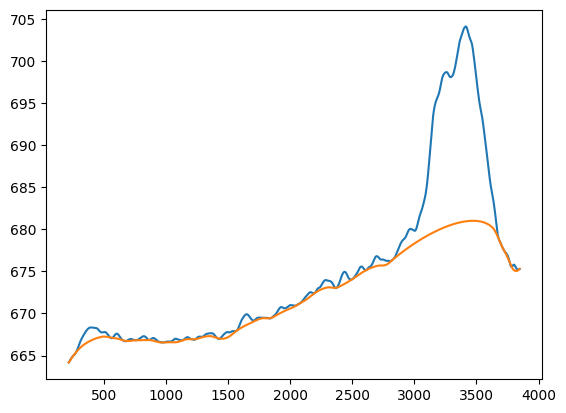

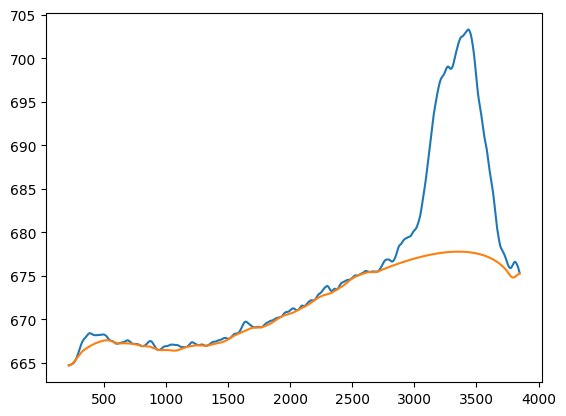

In [23]:
from br import bubblefill

import matplotlib.pyplot as plt

for i, spectrum in enumerate(smoothed_data):
    base = bubblefill(spectrum, min_bubble_widths=[(100 if (n < 3100 or n > 3750) else 700) for n in x_axis])

    plt.plot(x_axis, spectrum)
    plt.plot(x_axis, base)
    plt.show()
    if not ((i +1) % 10):
        break

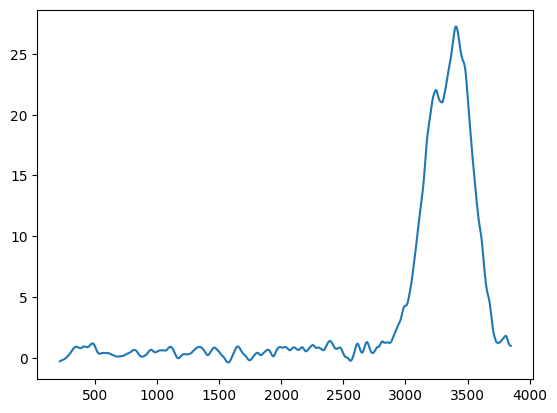

In [24]:
plt.plot(x_axis, smoothed_data[0] - base)
plt.show()